 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns_dataframe = pd.read_csv(whale_returns_csv)
whale_returns_dataframe.set_index(pd.to_datetime(whale_returns_dataframe['Date'], infer_datetime_format=True), inplace=True)
whale_returns_dataframe.drop(columns=['Date'], inplace=True)
whale_returns_dataframe.sort_index(ascending=True, inplace=True)
whale_returns_dataframe.head(5)

whale_returns_dataframe.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [3]:
# Count nulls
whale_returns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_dataframe.dropna(inplace=True)
whale_returns_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns_dataframe = pd.read_csv(algo_returns_csv)
algo_returns_dataframe.set_index(pd.to_datetime(algo_returns_dataframe['Date'], infer_datetime_format=True), inplace=True)
algo_returns_dataframe.drop(columns=['Date'], inplace=True)
algo_returns_dataframe.sort_index(ascending=True, inplace=True)
algo_returns_dataframe.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [6]:
# Count nulls
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_dataframe.dropna(inplace=True)
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("sp500_history.csv")
sp500_history_dataframe = pd.read_csv(sp500_history_csv)
sp500_history_dataframe.set_index(pd.to_datetime(sp500_history_dataframe['Date'], infer_datetime_format=True), inplace=True)
sp500_history_dataframe.drop(columns=['Date'], inplace=True)
sp500_history_dataframe.sort_index(ascending=True, inplace=True)
sp500_history_dataframe.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [9]:
# Check Data Types
sp500_history_dataframe.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_dataframe['Close'] = sp500_history_dataframe['Close'].str.replace('$', '')
sp500_history_dataframe['Close'] = sp500_history_dataframe['Close'].astype('float')
sp500_history_dataframe.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_history_dataframe = sp500_history_dataframe.pct_change()
sp500_history_dataframe

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp500_history_dataframe.dropna(inplace=True)
sp500_history_dataframe.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename Column
sp500_history_dataframe = sp500_history_dataframe.rename(columns={
    "Close": "S&P500"
})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_dataframe = pd.concat([sp500_history_dataframe, algo_returns_dataframe, whale_returns_dataframe], axis="columns", join="inner")
combined_returns_dataframe

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


In [15]:
combined_returns_dataframe.isnull().sum()

S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [16]:
combined_returns_dataframe.dropna(inplace=True)

In [17]:
# Concatenate all DataFrames into a single DataFrame
combined_returns_dataframe.sum()

S&P500                         0.364329
Algo 1                         0.690246
Algo 2                         0.274803
SOROS FUND MANAGEMENT LLC      0.184891
PAULSON & CO.INC.             -0.223137
TIGER GLOBAL MANAGEMENT LLC   -0.086650
BERKSHIRE HATHAWAY INC         0.527786
dtype: float64

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

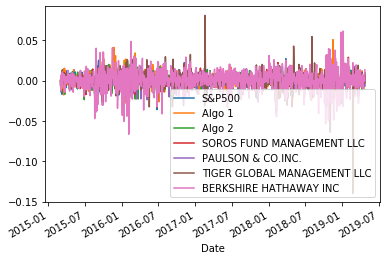

In [18]:
# Plot daily returns
combined_returns_dataframe.plot()

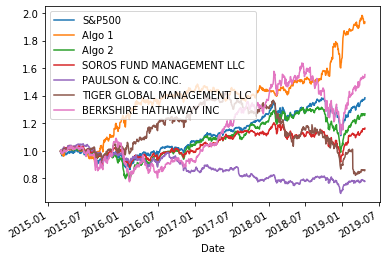

In [19]:
# Plot cumulative returns
cumulative_combined_returns = (1 + combined_returns_dataframe).cumprod().plot()

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

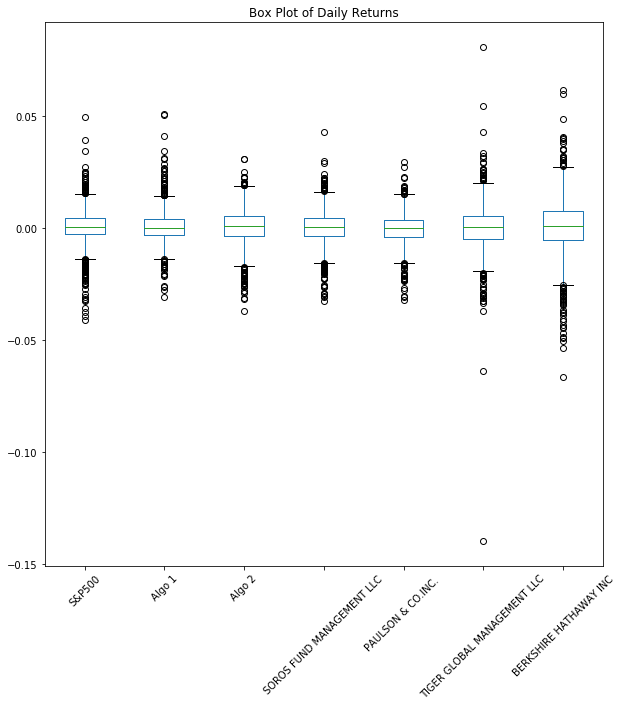

In [20]:
# Box plot to visually show risk
combined_returns_dataframe.plot.box(rot=45,figsize=(10,10), title="Box Plot of Daily Returns")

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
daily_std_combined = combined_returns_dataframe.std()
daily_std_combined

S&P500                         0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [22]:
# Determine which portfolios are riskier than the S&P 500
daily_std_combined = daily_std_combined.sort_values(ascending=False)
daily_std_combined

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P500                         0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_combined = daily_std_combined * np.sqrt(252)
annualized_std_combined

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P500                         0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

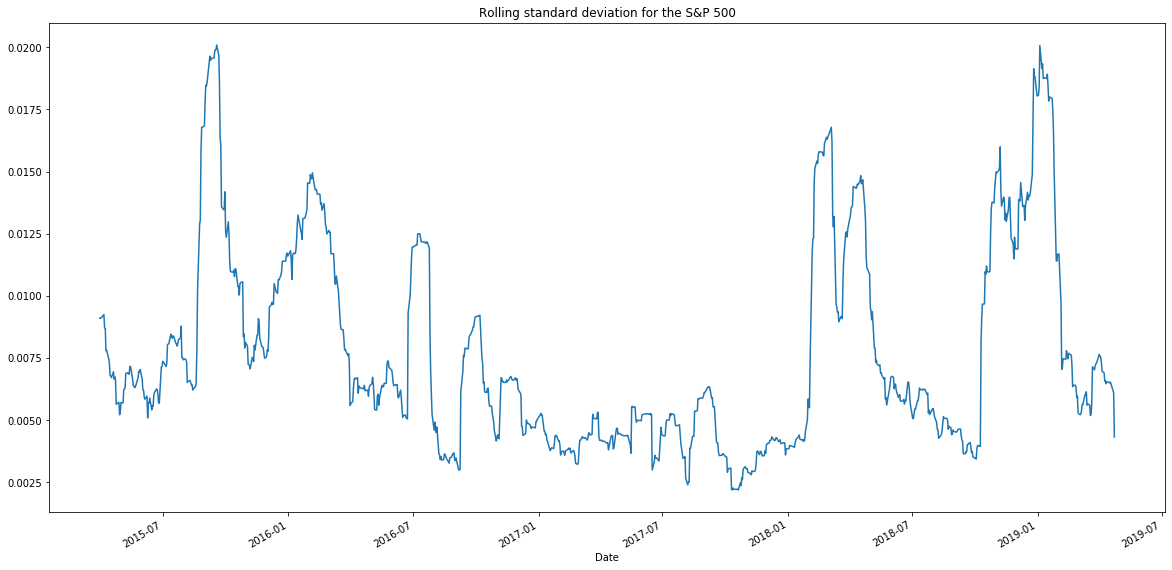

In [24]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_returns_dataframe["S&P500"].rolling(window=21).std().plot(figsize=(20,10), title="Rolling standard deviation for the S&P 500")

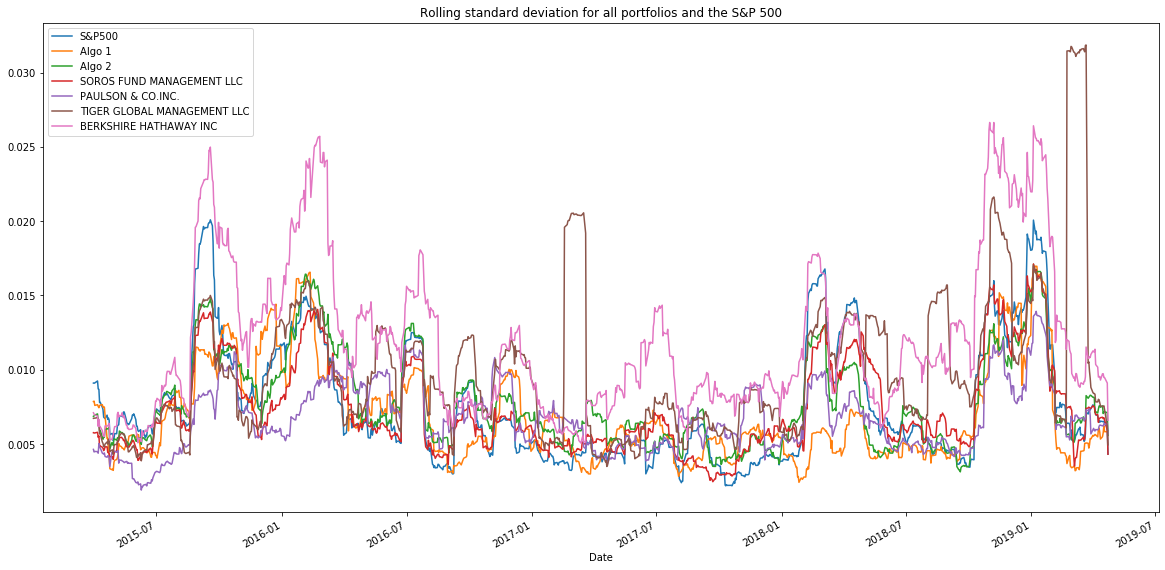

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
combined_returns_dataframe.rolling(window=21).std().plot(figsize=(20,10), title="Rolling standard deviation for all portfolios and the S&P 500")

In [26]:
# Correlation
combined_corr_table = combined_returns_dataframe.corr()
combined_corr_table

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
S&P500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_returns_dataframe['Algo 2'].cov(combined_returns_dataframe['S&P500'])
print(covariance)
variance = combined_returns_dataframe['S&P500'].var()
print(variance)
algo2_beta = covariance / variance
print(algo2_beta)

6.127932374145016e-05
7.316632424648712e-05
0.8375345402757788


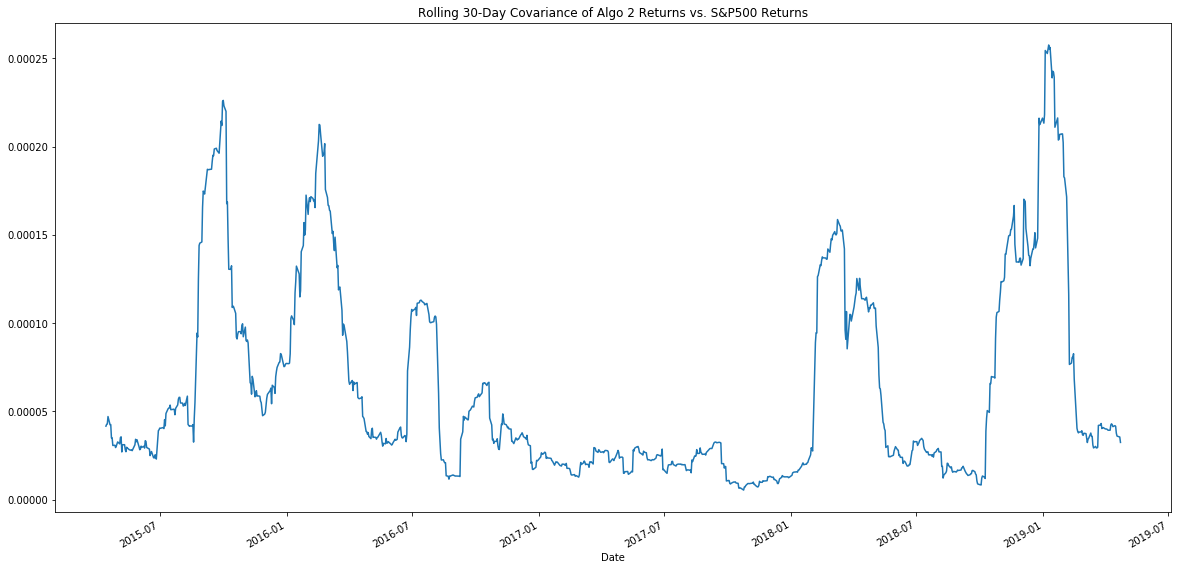

In [28]:
rolling_covariance = combined_returns_dataframe['Algo 2'].rolling(window=30).cov(combined_returns_dataframe['S&P500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Algo 2 Returns vs. S&P500 Returns')

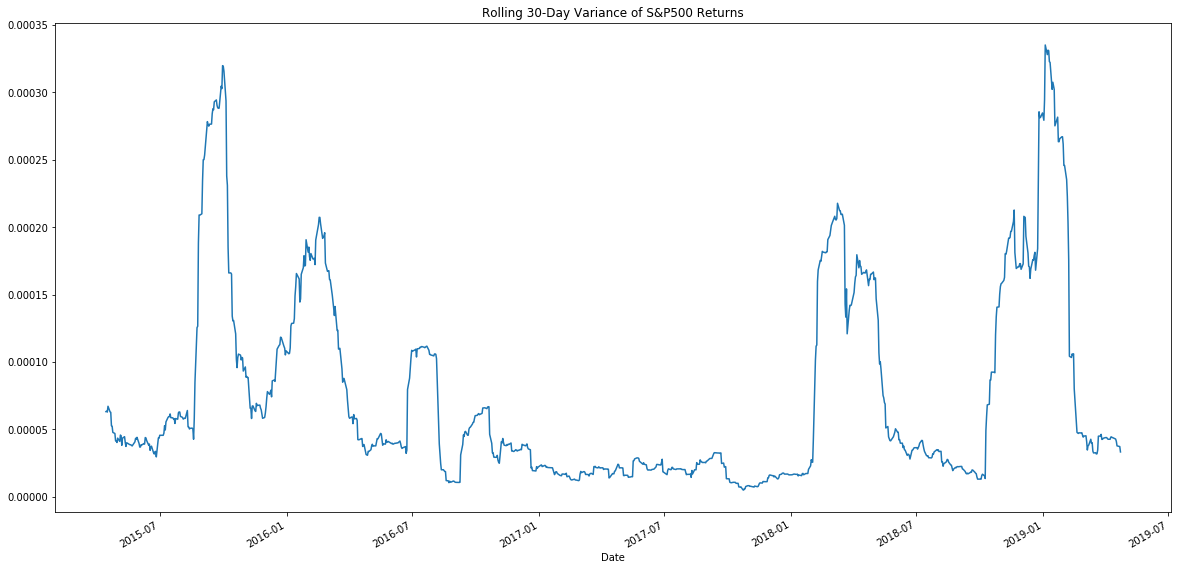

In [29]:
rolling_variance = combined_returns_dataframe['S&P500'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P500 Returns')

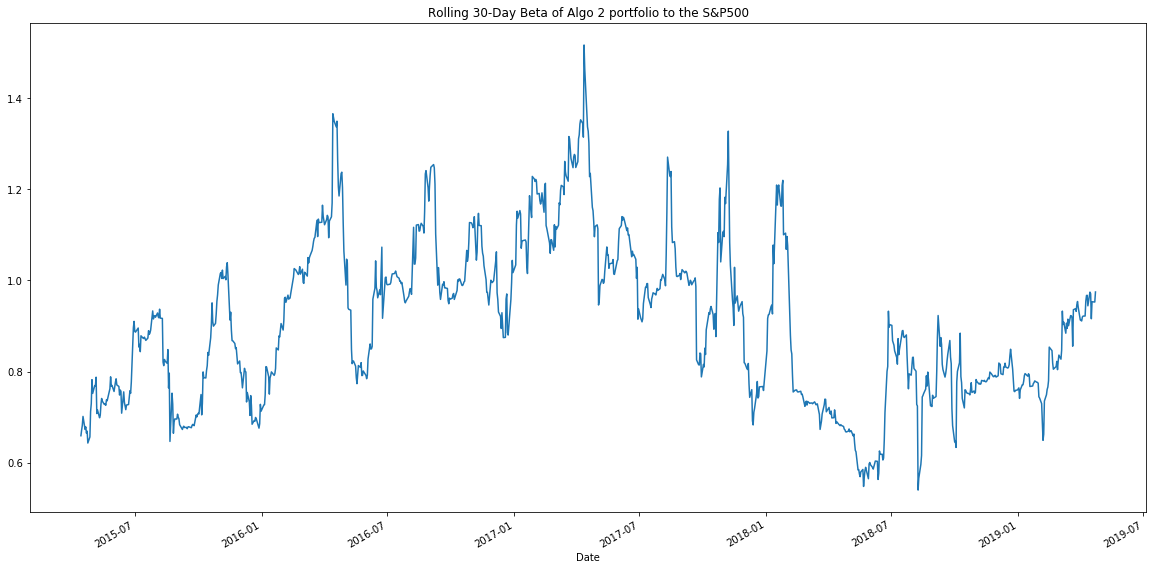

In [30]:
# Calculate 30-day rolling beta of AMZN and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 2 portfolio to the S&P500')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [31]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns_dataframe.mean() * 252) / (daily_std_combined * np.sqrt(252))
sharpe_ratios

Algo 1                         1.378648
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
PAULSON & CO.INC.             -0.483570
S&P500                         0.648267
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

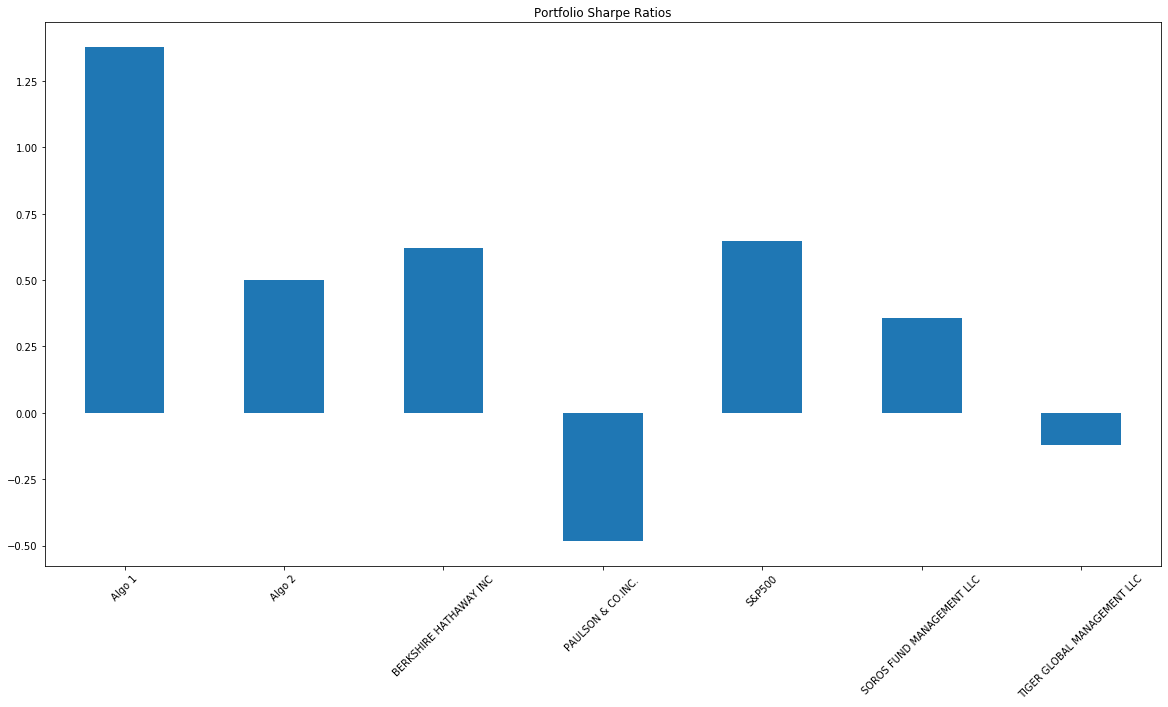

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(rot=45, figsize=(20, 10), title='Portfolio Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [66]:
aapl_path = Path("customportfolio/aapl_history.csv")
aep_path = Path("customportfolio/aep_history.csv")
amn_path = Path("customportfolio/amn_history.csv")
amt_path = Path("customportfolio/amt_history.csv")
amzn_path = Path("customportfolio/amzn_history.csv")
cashusd_path = Path("customportfolio/cashusd_history.csv")
cci_path = Path("customportfolio/cci_history.csv")
crm_path = Path("customportfolio/crm_history.csv")
dltr_path = Path("customportfolio/dltr_history.csv")
ecpg_path = Path("customportfolio/ecpg_history.csv")
eqix_path = Path("customportfolio/eqix_history.csv")
etr_path = Path("customportfolio/etr_history.csv")
gld_path = Path("customportfolio/gld_history.csv")
hrl_path = Path("customportfolio/hrl_history.csv")
hsy_path = Path("customportfolio/hsy_history.csv")
ko_path = Path("customportfolio/ko_history.csv")
lmt_path = Path("customportfolio/lmt_history.csv")
msft_path = Path("customportfolio/msft_history.csv")
nee_path = Path("customportfolio/nee_history.csv")
praa_path = Path("customportfolio/praa_history.csv")
uup_path = Path("customportfolio/uup_history.csv")
v_path = Path("customportfolio/v_history.csv")
wmt_path = Path("customportfolio/wmt_history.csv")
spy_path = Path("customportfolio/spy_history.csv")

aapl_data = pd.read_csv(aapl_path)
aep_data = pd.read_csv(aep_path)
amn_data = pd.read_csv(amn_path)
amt_data = pd.read_csv(amt_path)
amzn_data = pd.read_csv(amzn_path)
cashusd_data = pd.read_csv(cashusd_path)
cci_data = pd.read_csv(cci_path)
crm_data = pd.read_csv(crm_path)
dltr_data = pd.read_csv(dltr_path)
ecpg_data = pd.read_csv(ecpg_path)
eqix_data = pd.read_csv(eqix_path)
etr_data = pd.read_csv(etr_path)
gld_data = pd.read_csv(gld_path)
hrl_data = pd.read_csv(hrl_path)
hsy_data = pd.read_csv(hsy_path)
ko_data = pd.read_csv(ko_path)
lmt_data = pd.read_csv(lmt_path)
msft_data = pd.read_csv(msft_path)
nee_data = pd.read_csv(nee_path)
praa_data = pd.read_csv(praa_path)
uup_data = pd.read_csv(uup_path)
v_data = pd.read_csv(v_path)
wmt_data = pd.read_csv(wmt_path)
spy_data = pd.read_csv(spy_path)

In [67]:
aapl_data.set_index(pd.to_datetime(aapl_data['Date'], infer_datetime_format=True), inplace=True)
aapl_data.drop(columns=['Date'], inplace=True)
aapl_data.sort_index(ascending=True, inplace=True)

aep_data.set_index(pd.to_datetime(aep_data['Date'], infer_datetime_format=True), inplace=True)
aep_data.drop(columns=['Date'], inplace=True)
aep_data.sort_index(ascending=True, inplace=True)

amn_data.set_index(pd.to_datetime(amn_data['Date'], infer_datetime_format=True), inplace=True)
amn_data.drop(columns=['Date'], inplace=True)
amn_data.sort_index(ascending=True, inplace=True)

amt_data.set_index(pd.to_datetime(amt_data['Date'], infer_datetime_format=True), inplace=True)
amt_data.drop(columns=['Date'], inplace=True)
amt_data.sort_index(ascending=True, inplace=True)

amzn_data.set_index(pd.to_datetime(amzn_data['Date'], infer_datetime_format=True), inplace=True)
amzn_data.drop(columns=['Date'], inplace=True)
amzn_data.sort_index(ascending=True, inplace=True)

cashusd_data.set_index(pd.to_datetime(cashusd_data['Date'], infer_datetime_format=True), inplace=True)
cashusd_data.drop(columns=['Date'], inplace=True)
cashusd_data.sort_index(ascending=True, inplace=True)

cci_data.set_index(pd.to_datetime(cci_data['Date'], infer_datetime_format=True), inplace=True)
cci_data.drop(columns=['Date'], inplace=True)
cci_data.sort_index(ascending=True, inplace=True)

crm_data.set_index(pd.to_datetime(crm_data['Date'], infer_datetime_format=True), inplace=True)
crm_data.drop(columns=['Date'], inplace=True)
crm_data.sort_index(ascending=True, inplace=True)

dltr_data.set_index(pd.to_datetime(dltr_data['Date'], infer_datetime_format=True), inplace=True)
dltr_data.drop(columns=['Date'], inplace=True)
dltr_data.sort_index(ascending=True, inplace=True)

ecpg_data.set_index(pd.to_datetime(ecpg_data['Date'], infer_datetime_format=True), inplace=True)
ecpg_data.drop(columns=['Date'], inplace=True)
ecpg_data.sort_index(ascending=True, inplace=True)

eqix_data.set_index(pd.to_datetime(eqix_data['Date'], infer_datetime_format=True), inplace=True)
eqix_data.drop(columns=['Date'], inplace=True)
eqix_data.sort_index(ascending=True, inplace=True)

etr_data.set_index(pd.to_datetime(etr_data['Date'], infer_datetime_format=True), inplace=True)
etr_data.drop(columns=['Date'], inplace=True)
etr_data.sort_index(ascending=True, inplace=True)

gld_data.set_index(pd.to_datetime(gld_data['Date'], infer_datetime_format=True), inplace=True)
gld_data.drop(columns=['Date'], inplace=True)
gld_data.sort_index(ascending=True, inplace=True)

hrl_data.set_index(pd.to_datetime(hrl_data['Date'], infer_datetime_format=True), inplace=True)
hrl_data.drop(columns=['Date'], inplace=True)
hrl_data.sort_index(ascending=True, inplace=True)

hsy_data.set_index(pd.to_datetime(hsy_data['Date'], infer_datetime_format=True), inplace=True)
hsy_data.drop(columns=['Date'], inplace=True)
hsy_data.sort_index(ascending=True, inplace=True)

ko_data.set_index(pd.to_datetime(ko_data['Date'], infer_datetime_format=True), inplace=True)
ko_data.drop(columns=['Date'], inplace=True)
ko_data.sort_index(ascending=True, inplace=True)

lmt_data.set_index(pd.to_datetime(lmt_data['Date'], infer_datetime_format=True), inplace=True)
lmt_data.drop(columns=['Date'], inplace=True)
lmt_data.sort_index(ascending=True, inplace=True)

msft_data.set_index(pd.to_datetime(msft_data['Date'], infer_datetime_format=True), inplace=True)
msft_data.drop(columns=['Date'], inplace=True)
msft_data.sort_index(ascending=True, inplace=True)

nee_data.set_index(pd.to_datetime(nee_data['Date'], infer_datetime_format=True), inplace=True)
nee_data.drop(columns=['Date'], inplace=True)
nee_data.sort_index(ascending=True, inplace=True)

praa_data.set_index(pd.to_datetime(praa_data['Date'], infer_datetime_format=True), inplace=True)
praa_data.drop(columns=['Date'], inplace=True)
praa_data.sort_index(ascending=True, inplace=True)

uup_data.set_index(pd.to_datetime(uup_data['Date'], infer_datetime_format=True), inplace=True)
uup_data.drop(columns=['Date'], inplace=True)
uup_data.sort_index(ascending=True, inplace=True)

v_data.set_index(pd.to_datetime(v_data['Date'], infer_datetime_format=True), inplace=True)
v_data.drop(columns=['Date'], inplace=True)
v_data.sort_index(ascending=True, inplace=True)

wmt_data.set_index(pd.to_datetime(wmt_data['Date'], infer_datetime_format=True), inplace=True)
wmt_data.drop(columns=['Date'], inplace=True)
wmt_data.sort_index(ascending=True, inplace=True)

spy_data.set_index(pd.to_datetime(spy_data['Date'], infer_datetime_format=True), inplace=True)
spy_data.drop(columns=['Date'], inplace=True)
spy_data.sort_index(ascending=True, inplace=True)

In [68]:
aapl_data = aapl_data.rename(columns={
    "Close": "aapl"
})

aep_data = aep_data.rename(columns={
    "Close": "aep"
})

amn_data = amn_data.rename(columns={
    "Close": "amn"
})

amt_data = amt_data.rename(columns={
    "Close": "amt"
})

amzn_data = amzn_data.rename(columns={
    "Close": "amzn"
})

cashusd_data = cashusd_data.rename(columns={
    "Close": "cashusd"
})
cashusd_data['cashusd'] = cashusd_data['cashusd'].astype('float')

cci_data = cci_data.rename(columns={
    "Close": "cci"
})

crm_data = crm_data.rename(columns={
    "Close": "crm"
})

dltr_data = dltr_data.rename(columns={
    "Close": "dltr"
})

ecpg_data = ecpg_data.rename(columns={
    "Close": "ecpg"
})

eqix_data = eqix_data.rename(columns={
    "Close": "eqix"
})

etr_data = etr_data.rename(columns={
    "Close": "etr"
})

gld_data = gld_data.rename(columns={
    "Close": "gld"
})

hrl_data = hrl_data.rename(columns={
    "Close": "hrl"
})

hsy_data = hsy_data.rename(columns={
    "Close": "hsy"
})

ko_data = ko_data.rename(columns={
    "Close": "ko"
})

lmt_data = lmt_data.rename(columns={
    "Close": "lmt"
})

msft_data = msft_data.rename(columns={
    "Close": "msft"
})

nee_data = nee_data.rename(columns={
    "Close": "nee"
})

praa_data = praa_data.rename(columns={
    "Close": "praa"
})

uup_data = uup_data.rename(columns={
    "Close": "uup"
})

v_data = v_data.rename(columns={
    "Close": "v"
})

wmt_data = wmt_data.rename(columns={
    "Close": "wmt"
})

spy_data = spy_data.rename(columns={
    "Close": "spy"
})

In [69]:
# Concatenate all stocks into a single DataFrame
custom_portfolio = pd.concat([aapl_data, aep_data, amn_data, amt_data, amzn_data, cashusd_data, cci_data, crm_data, dltr_data, ecpg_data, eqix_data, etr_data, gld_data, hrl_data, hsy_data, ko_data, lmt_data, msft_data, nee_data, praa_data, uup_data, v_data, wmt_data], axis="columns", join="inner")
custom_portfolio = custom_portfolio.pct_change()
custom_portfolio.head()



,aapl,aep,amn,amt,amzn,cashusd,cci,crm,dltr,ecpg,...,hrl,hsy,ko,lmt,msft,nee,praa,uup,v,wmt
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,0.001810,0.001307,0.007347,-0.009446,0.000982,0.0,-0.011407,-0.003858,0.022595,-0.016008,...,-0.001215,0.005426,0.005563,-0.003197,0.000827,0.001624,-0.022537,-0.000385,0.005011,0.008566
2019-04-16,0.000100,-0.014360,-0.024311,-0.019838,0.009849,0.0,-0.021900,-0.008745,-0.004681,0.015230,...,-0.007786,0.000771,-0.001064,0.004373,-0.002313,-0.008579,0.020454,0.002312,-0.001309,0.004881
2019-04-17,0.019473,0.001806,-0.020141,-0.005359,0.000955,0.0,-0.003531,-0.021110,0.015897,-0.025230,...,-0.001471,-0.000685,0.007029,0.001419,0.008280,0.000686,-0.018950,-0.000769,0.001311,0.002235
2019-04-18,0.003594,-0.002284,0.020555,0.009102,-0.001678,0.0,-0.012483,0.004184,0.006204,0.019937,...,-0.008104,0.001799,0.004230,0.012110,0.013140,-0.001529,0.013001,0.005387,-0.001745,0.000194


In [70]:
# Drop nulls
custom_portfolio.dropna(inplace=True)
custom_portfolio.isnull().sum()

aapl       0
aep        0
amn        0
amt        0
amzn       0
cashusd    0
cci        0
crm        0
dltr       0
ecpg       0
eqix       0
etr        0
gld        0
hrl        0
hsy        0
ko         0
lmt        0
msft       0
nee        0
praa       0
uup        0
v          0
wmt        0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Calculate weighted portfolio returns
weights = [0.05, 0.03, 0.02, 0.03, 0.03, 0.24, 0.03, 0.03, 0.03, 0.01, 0.03, 0.03, 0.07, 0.02, 0.03, 0.04, 0.03, 0.03, 0.03, 0.01, 0.08, 0.06, 0.04]
custom_portfolio_returns = custom_portfolio.dot(weights)
custom_portfolio_returns.head()

Date
2019-04-15    0.000397
2019-04-16   -0.003614
2019-04-17   -0.000194
2019-04-18    0.002279
2019-04-22    0.000696
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
combined_with_custom = pd.concat([custom_portfolio_returns, combined_returns_dataframe], axis="columns", join="inner")

combined_with_custom = combined_with_custom.rename(columns={
    0: "Custom"
})

combined_with_custom.head(10)
#note - instructions to download one year of data from current left very little overlap with performance data from starter files

,Custom,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2019-04-15,0.000397,-0.000629,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,-0.003614,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.000194,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.002279,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-22,0.000696,0.001012,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-23,0.006984,0.008841,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278


In [73]:
spy_data = spy_data.pct_change()
custom_and_spy = pd.concat([custom_portfolio_returns, spy_data], axis="columns", join="inner")
custom_and_spy = custom_and_spy.rename(columns={
    0: "Custom"
})
custom_and_spy.head()



,Custom,spy
Date,,
2019-04-15,0.000397,-0.000655
2019-04-16,-0.003614,0.000655
2019-04-17,-0.000194,-0.002447
2019-04-18,0.002279,0.001969
2019-04-22,0.000696,0.000862


In [74]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_with_custom.dropna(inplace=True)
combined_with_custom.isnull().sum()


Custom                         0
S&P500                         0
Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [75]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

custom_and_spy.dropna(inplace=True)
custom_and_spy.isnull().sum()

Custom    0
spy       0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [76]:
custom_and_spy.head()

,Custom,spy
Date,,
2019-04-15,0.000397,-0.000655
2019-04-16,-0.003614,0.000655
2019-04-17,-0.000194,-0.002447
2019-04-18,0.002279,0.001969
2019-04-22,0.000696,0.000862


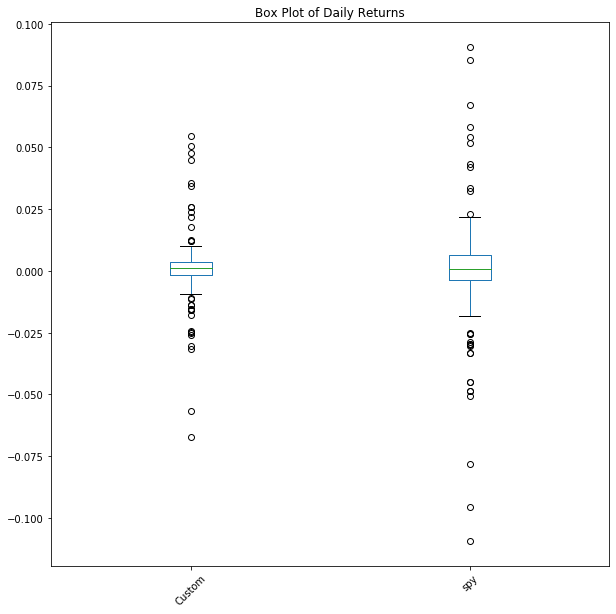

In [77]:
# Risk
# Box plot to visually show risk
custom_and_spy.plot.box(rot=45,figsize=(10,10), title="Box Plot of Daily Returns")

In [78]:
#calculate std
daily_std_custom = custom_and_spy.std()
daily_std_custom


Custom    0.011479
spy       0.019397
dtype: float64

In [79]:
#calculate annualized std
annualized_std_custom = daily_std_custom * np.sqrt(252)
annualized_std_custom

Custom    0.182218
spy       0.307925
dtype: float64

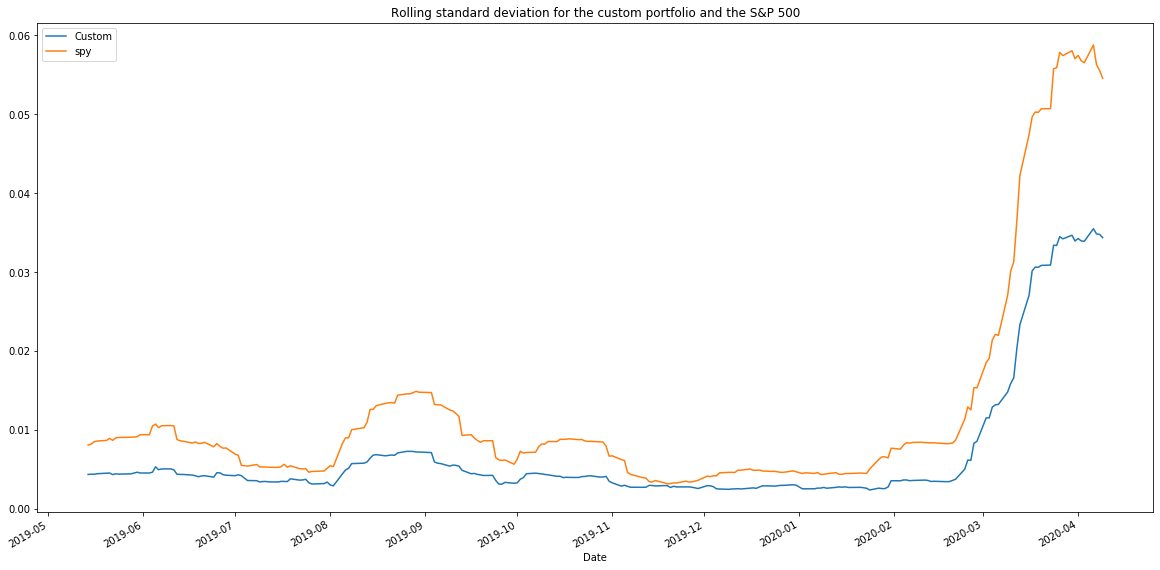

In [80]:
# Rolling
custom_and_spy.rolling(window=21).std().plot(figsize=(20,10), title="Rolling standard deviation for the custom portfolio and the S&P 500")

In [81]:
# Beta
covariancecustom = custom_and_spy['Custom'].cov(custom_and_spy['spy'])
print(covariancecustom)
variancecustom = custom_and_spy['spy'].var()
print(variancecustom)
custom_beta = covariance / variance
print(custom_beta)

0.00021119270026778036
0.0003762600962796392
0.8375345402757788


In [82]:
# Annualzied Sharpe Ratios
sharpe_ratios_custom = (custom_and_spy.mean() * 252) / (daily_std_custom * np.sqrt(252))
sharpe_ratios_custom


Custom    0.871442
spy       0.017084
dtype: float64

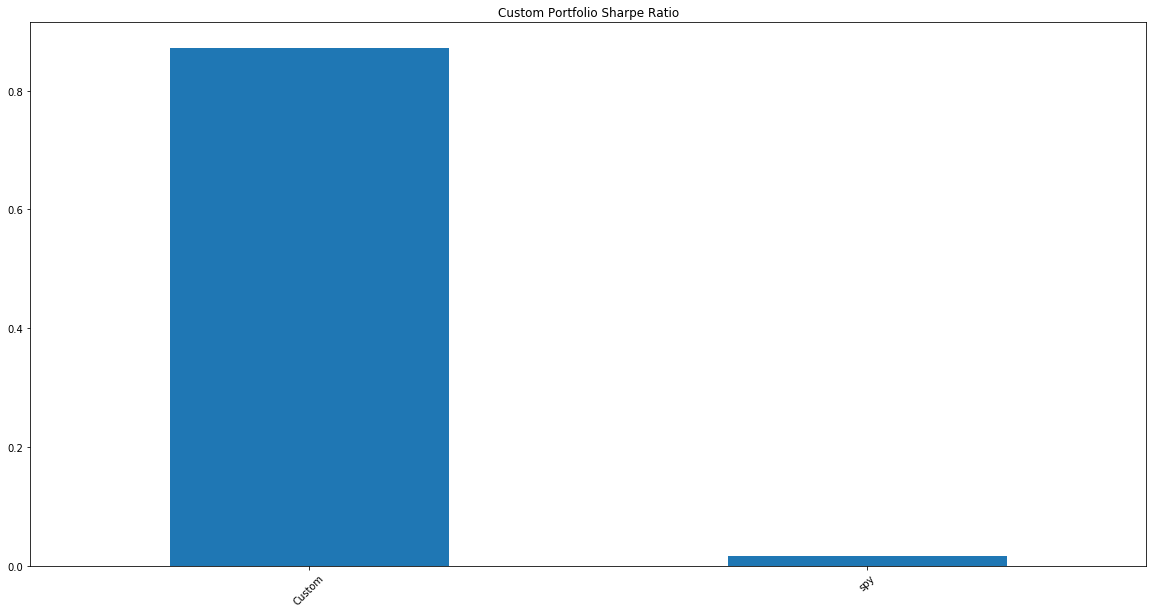

In [83]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot.bar(rot=45, figsize=(20, 10), title='Custom Portfolio Sharpe Ratio')

## Include correlation analysis to determine which stocks (if any) are correlated

In [84]:
custom_corr_table = custom_portfolio.corr()
custom_corr_table

,aapl,aep,amn,amt,amzn,cashusd,cci,crm,dltr,ecpg,...,hrl,hsy,ko,lmt,msft,nee,praa,uup,v,wmt
aapl,1.000000,0.540082,0.361617,0.592703,0.687933,NaN,0.606740,0.704749,0.452164,0.308720,...,0.448800,0.515389,0.658363,0.640007,0.847037,0.616506,0.507300,0.306045,0.814047,0.594056
aep,0.540082,1.000000,0.299153,0.758839,0.427526,NaN,0.707049,0.482853,0.299934,0.193163,...,0.569262,0.571346,0.770260,0.697039,0.569027,0.830016,0.403174,-0.012827,0.577088,0.597966
amn,0.361617,0.299153,1.000000,0.215500,0.374752,NaN,0.240483,0.283288,0.110183,-0.069319,...,0.334824,0.117297,0.314709,0.283718,0.388471,0.235410,0.080513,0.265394,0.226426,0.533586
amt,0.592703,0.758839,0.215500,1.000000,0.443471,NaN,0.904197,0.584563,0.369315,0.238551,...,0.536571,0.723642,0.750862,0.719326,0.668475,0.781617,0.395520,0.217745,0.696450,0.556229
amzn,0.687933,0.427526,0.374752,0.443471,1.000000,NaN,0.450792,0.676139,0.434000,0.086827,...,0.397133,0.382744,0.497325,0.510105,0.774952,0.458253,0.347433,0.310842,0.612387,0.587436
cashusd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cci,0.606740,0.707049,0.240483,0.904197,0.450792,NaN,1.000000,0.551763,0.353674,0.264198,...,0.514980,0.704545,0.754519,0.673360,0.665443,0.758308,0.408083,0.157526,0.674889,0.535275
crm,0.704749,0.482853,0.283288,0.584563,0.676139,NaN,0.551763,1.000000,0.483471,0.284752,...,0.419563,0.544851,0.554473,0.565944,0.802106,0.603752,0.511757,0.330341,0.761356,0.543329
dltr,0.452164,0.299934,0.110183,0.369315,0.434000,NaN,0.353674,0.483471,1.000000,0.275480,...,0.262544,0.521615,0.314308,0.275073,0.515064,0.394458,0.386462,0.199041,0.460964,0.480383
ecpg,0.308720,0.193163,-0.069319,0.238551,0.086827,NaN,0.264198,0.284752,0.275480,1.000000,...,0.052974,0.348792,0.300086,0.166661,0.286388,0.335602,0.751724,-0.228420,0.475083,-0.047859


In [ ]:
#There are a number of highly correlated stocks, such as NEE vs AMT vs CCI, as these are energy stocks. Oddly though, KO is also highly correlated with NEE, AEO